# Evaluate planing quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from skimage import segmentation

import os
import re
import glob

from skimage import io

In [2]:
#root = r'E:\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Registration_user_study'
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Planning_user_study'

In [3]:
anonymize = False
save_figures = True

In [4]:
animals = os.listdir(root)
animals

['P1_H_B6_M52',
 'P1_H_B6_M57',
 'P1_H_B6_M61',
 'P1_H_C3H_M46',
 'P1_H_C3H_M48',
 'P1_H_C3H_M54',
 'P1_H_C3H_M58',
 'P2E_M11',
 'P2E_M14',
 'P2E_M2']

Let's first get an overview of all conducted plans and the respective observer:

In [5]:
plans = {'animal': [], 'observer': [], 'filenames': []}
for animal in animals:
    filenames = glob.glob(os.path.join(root, animal, '*.tif'))
    plans['animal'] += [animal] * len(filenames)
    plans['observer'] += [os.path.basename(f).split('_')[0] for f in filenames]
    plans['filenames'] += [os.path.basename(f) for f in filenames]

plans = pd.DataFrame(plans)
plans
    

,animal,observer,filenames
0,P1_H_B6_M52,JM,JM_220510_P1_H_B6_M52_Plan.tif
1,P1_H_B6_M52,JM,JM_220513_P1_H_B6_M52_Plan.tif
2,P1_H_B6_M52,JM,JM_220519_P1_H_B6_M52_Plan.tif
3,P1_H_B6_M52,MS,MS_P1_H_B6_M52_replanning.tif
4,P1_H_B6_M52,TS,TS_P1_H_B6_M52_Plan_2022-0505.tif
5,P1_H_B6_M57,JM,JM_220510_P1_H_B6_M57_Plan.tif
6,P1_H_B6_M57,JM,JM_220519_P1_H_B6_M57_Plan.tif
7,P1_H_B6_M57,MS,MS_P1_H_B6_M57_replanning.tif
8,P1_H_B6_M57,TS,TS_P1_H_B6_M57_Plan_2022-0505.tif
9,P1_H_B6_M61,MS,MS_P1_H_B6_M61_replanning.tif


In [6]:
def get_plans(plan_file: str) -> np.ndarray:
    """Retrieve plan from file"""
    plan = io.imread(plan_file).astype(np.uint16)

    plan_index = 0
    for z in range(plan.shape[0]):
        if len(np.unique(plan[z])) == 3:
            plan_index = z
    plan = segmentation.relabel_sequential(plan[plan_index])[0]

    return plan

def fuse_plans(plan_stack: np.ndarray) -> np.ndarray:
    """Fuse multiple plan files in a stack into a single image using a majority vote approach."""
    return np.asarray(stats.mode(plan_stack, axis=0))[0].squeeze()

def calculate_jaccard_score(plan_stack: np.ndarray, plan_fused: np.ndarray):
    """Calculate the jaccard score for a stack of plans and a reference fused plan"""
    
    JC = []
    for idx, plan in enumerate(plan_stack):
        JC.append(metrics.jaccard_score(plan_fused.flatten(), plan.flatten(), average=None))
    df = pd.DataFrame(JC, columns = [f'JC Label: {i}' for i in range(plan.max() + 1)])    
    return df


## Inter-observer variability

We first analyze inter-observer variability. For this, we remove occurrences of repeated plannings of animals by single users. More precisely, if an observer repeated the planning of the same animal multiple times, we keep only the results of the first run.

In [7]:
inter_observer = plans.drop_duplicates(subset = ['observer', 'animal'], keep='first')

In [8]:
get_plans

<function __main__.get_plans(plan_file: str) -> numpy.ndarray>

In [9]:
for animal in animals:
    _plans = inter_observer[inter_observer['animal'] == animal]
    plan_data = [get_plans(os.path.join(root, animal, f)) for f in _plans['filenames']]
    plan_data = np.stack(plan_data)
    
    plan_data_fused = fuse_plans(plan_data)
    jc = calculate_jaccard_score(plan_data, plan_data_fused)
    inter_observer.loc[inter_observer[inter_observer['animal'] == animal].index, jc.columns] = jc.to_numpy()
    #print(animal, jc.columns)
    

In [10]:
inter_observer

,animal,observer,filenames,JC Label: 0,JC Label: 1,JC Label: 2
0,P1_H_B6_M52,JM,JM_220510_P1_H_B6_M52_Plan.tif,0.997534,0.951002,0.974943
3,P1_H_B6_M52,MS,MS_P1_H_B6_M52_replanning.tif,0.997946,0.920086,0.739698
4,P1_H_B6_M52,TS,TS_P1_H_B6_M52_Plan_2022-0505.tif,0.997356,0.903630,0.702290
5,P1_H_B6_M57,JM,JM_220510_P1_H_B6_M57_Plan.tif,0.996169,0.909667,0.920617
7,P1_H_B6_M57,MS,MS_P1_H_B6_M57_replanning.tif,0.997602,0.903205,0.709005
8,P1_H_B6_M57,TS,TS_P1_H_B6_M57_Plan_2022-0505.tif,0.998379,0.947279,0.873975
9,P1_H_B6_M61,MS,MS_P1_H_B6_M61_replanning.tif,0.997012,0.889638,0.704180
10,P1_H_B6_M61,TS,TS_P1_H_B6_M61_Plan_2022-05-13.tif,0.998746,0.939108,0.776596
13,P1_H_C3H_M46,JM,JM_220513_P1_H_B6_M46_Plan.tif,0.998260,0.934858,0.908405
14,P1_H_C3H_M46,MS,MS_P1_H_C3H_M46_replanning.tif,0.999277,0.954598,0.851256


### Visualization and quantification

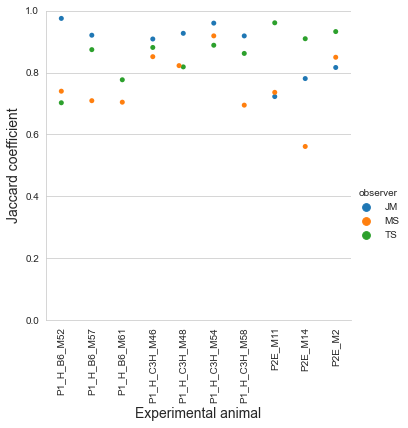

In [11]:
sns.set_style("whitegrid")
g = sns.catplot(data=inter_observer, x='animal', y='JC Label: 2', hue='observer', kind='swarm')
g.set_xticklabels(rotation=90)
g.set_xlabels('Experimental animal', fontsize=14)
g.set_ylabels('Jaccard coefficient', fontsize=14)
g.set(ylim=[0, 1])

In [12]:
mean = inter_observer['JC Label: 2'].mean()
std = inter_observer['JC Label: 2'].std()
print(f'Mean Jaccard index: {mean} +/- {std}')

Mean Jaccard index: 0.8316696586113963 +/- 0.10220152867693373


Text(0.5, 1.0, 'Fusion')

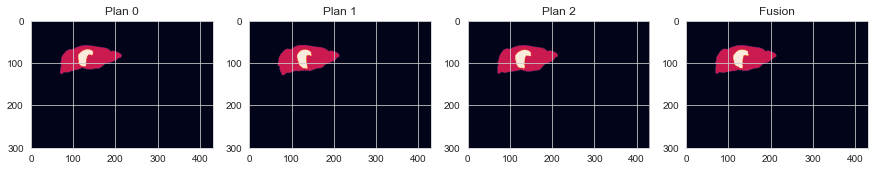

In [13]:
fig, ax = plt.subplots(ncols = len(plan_data)+1, figsize = (15, 10))
[ax[i].imshow(plan) for i, plan in enumerate(plan_data)]
[ax[i].set_title(f'Plan {i}') for i in range(len(plan_data))]
ax[-1].imshow(plan_data_fused)
ax[-1].set_title('Fusion')